In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import sys
sys.path.append("../src") 
#from script import prepare_platform_data, evaluar_modelos


In [3]:
data_clean= pd.read_csv('../data/data_limpia.csv', encoding='latin1')

## Primer modelo

In [4]:
# Definimos las variables predictoras (features) y la variable objetivo (target)
features = [
    'Spotify Playlist Count',
    'Spotify Playlist Reach',
    'Spotify Popularity',
    'YouTube Views',
    'YouTube Likes',
    'TikTok Views',
    'TikTok Likes',
    'Shazam Counts',
    'Track Score',
    'All Time Rank',
    'Release Year',
    'Spotify Streams'
]


#Variable objetivo
target = 'Explicit Track'

In [5]:
df = data_clean.copy()

In [6]:
# Copiamos el dataset y convertimos todo a formato numérico

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')


In [7]:
#Convertir a formato numérico y eliminar filas con valores nulos por si quedaban
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[target] = pd.to_numeric(df[target], errors='coerce')

#unimos las variables predictivas y variable objetivo
df_data_para_separar = pd.concat([df[features], df[target]], axis=1)
df_data_para_separar = df_data_para_separar.dropna()


In [8]:
#Crea estandarizador
scaler = StandardScaler()

In [9]:
#inecesaria X_scaled = scaler.fit_transform(X)

#separacia predictoras y objetivo
X = df_data_para_separar[features]
y = df_data_para_separar[target]

In [10]:
#separacion de datos de entrenamiento y prueba
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify= y
)

In [11]:
#Estandarizacion de los datos
X_train_rev = scaler.fit_transform(X_train_rev)
X_test_rev = scaler.transform(X_test_rev)

In [12]:
modelo_logistico = LogisticRegression(solver='liblinear', random_state=42)


In [13]:
#Entrenamiento del modelo
modelo_logistico.fit(X_train_rev, y_train_rev)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [14]:
#Crea la prediccion el modelo
y_predicted = modelo_logistico.predict(X_test_rev)


In [15]:
#Calcula la exactitud del modelo
accuracy_score(y_test_rev, y_predicted)

0.694135115070527

In [16]:
#matriz de confusion
confusion_matrix(y_test_rev, y_predicted)


array([[795,  65],
       [347, 140]])

In [17]:
#Matriz de clasificación
print(classification_report(y_test_rev, y_predicted, target_names=['No Explicita','Explicita']))


              precision    recall  f1-score   support

No Explicita       0.70      0.92      0.79       860
   Explicita       0.68      0.29      0.40       487

    accuracy                           0.69      1347
   macro avg       0.69      0.61      0.60      1347
weighted avg       0.69      0.69      0.65      1347



In [18]:
#Reporte de clasificación
coeficientes = pd.Series(modelo_logistico.coef_[0], index = X.columns)

print(coeficientes.sort_values(ascending=False))


Spotify Playlist Count    1.336771
TikTok Likes              0.302126
Track Score               0.274728
Release Year              0.202207
Spotify Popularity        0.048634
All Time Rank             0.025332
YouTube Likes            -0.007615
Spotify Playlist Reach   -0.242915
YouTube Views            -0.370619
Spotify Streams          -0.563171
TikTok Views             -0.565138
Shazam Counts            -0.668351
dtype: float64


<Axes: >

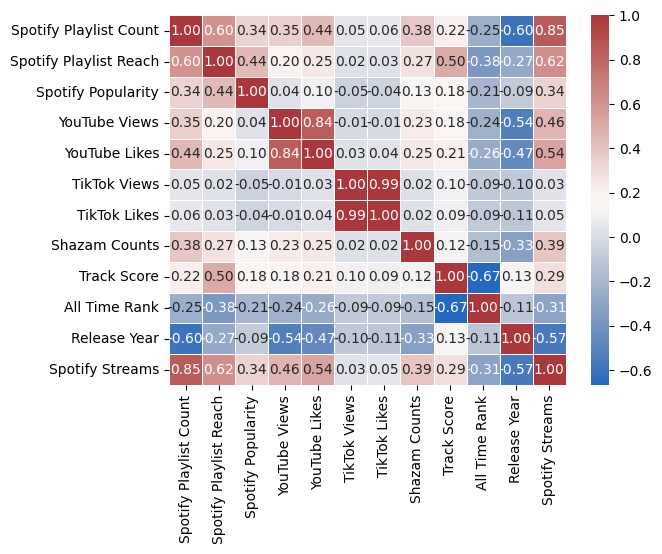

In [19]:
data_correlacion = pd.DataFrame(X_train_rev, columns= X.columns)

matriz_correlacion = data_correlacion.corr(method='pearson')

sns.heatmap(
    matriz_correlacion,
    annot = True,
    fmt = ".2f",
    cmap='vlag',
    linewidths=.5,
    cbar = True,
)